# Первичный анализ данных

## Библиотеки

In [2]:
import pandas as pd
import ipyplot
import seaborn as sns

## Загрузка данных

In [3]:
transactions = pd.read_csv('./data_prepared/transactions_train.csv', date_parser='t_dat', dtype={'article_id': str})
articles = pd.read_csv('./data_prepared/articles.csv', dtype={'article_id': str})
customers = pd.read_csv('./data_prepared/customers.csv')

## articles

### Самые ходовые товары

In [4]:
COUNT_TOP_ARTICLES = 12
top_articles = articles.sort_values(by='rating', ascending=False).head(COUNT_TOP_ARTICLES)['article_id'].to_list()

path_to_top_articles = [f'./data/images/{article[:3]}/{article}.jpg' for article in top_articles]
labels = articles.set_index('article_id').loc[top_articles]['section_name'].to_list()

In [5]:
ipyplot.plot_images(path_to_top_articles, labels, max_images=COUNT_TOP_ARTICLES, img_width=150, show_url=False)

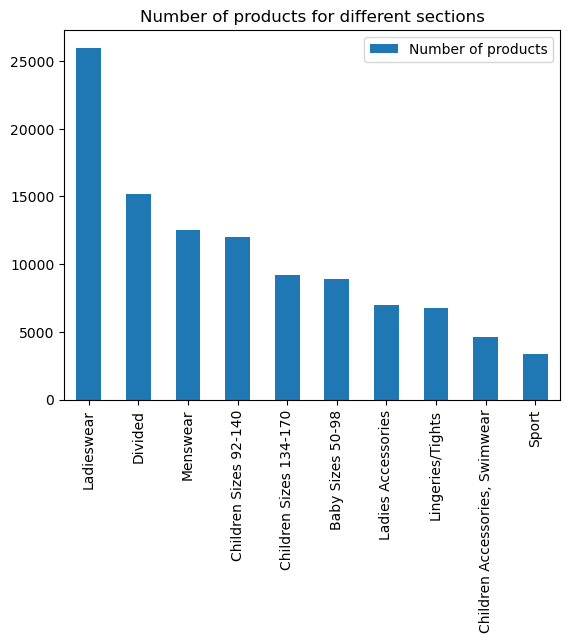

In [36]:
ax = articles['index_name'].value_counts().plot(kind='bar', title='Number of products for different sections', label='Number of products')
ax.legend()

### Корреляционная матрица

<AxesSubplot:>

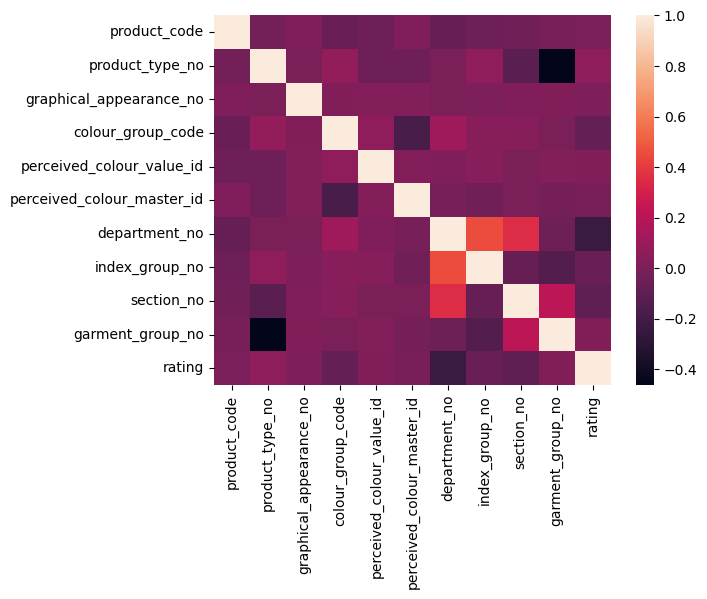

In [5]:
corr = articles.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

__Вывод__

Чаще всего в магазине H&M покупают джинсы/штаны. И почти все приведенные товары - женские.
В корреляционной матрице линейных зависимсотей не обнаружено.

## customers

### Распределение количества транзакиций на возрастные группы

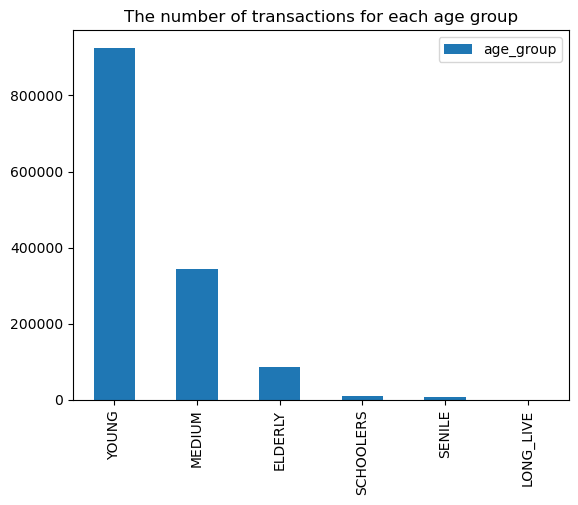

In [6]:
ax = customers['age_group'].value_counts().plot(kind='bar', title='The number of transactions for each age group')
ax.legend()

### Корреляционная матрица

<AxesSubplot:>

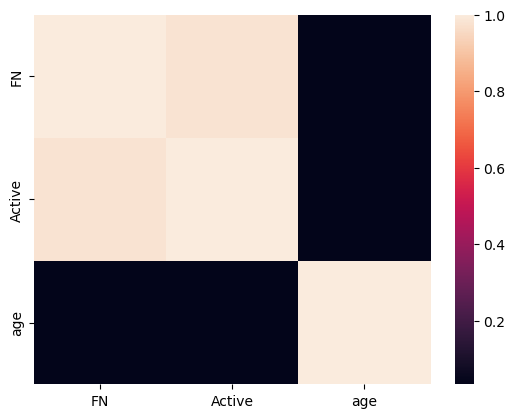

In [8]:
corr = customers.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

__Вывод__

Самая активная возрастная группа в магазине H&M - _YOUNG (18-44 года)_.
В корреляционной матрице имеется очень сильная линейная зависимость между признаками Active и FN. Имеет смысл оставить только один признак.